In [22]:
#importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df=pd.read_csv(r'C:\Users\INTEL\Desktop\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
#SHAPE OF THE DATASET
print(df.shape)
#checking the columns
print(df.keys())

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [25]:
#checking the datatypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [26]:
#Dropping Duplicates
df=df.drop_duplicates()
df.shape

(1337, 7)

In [27]:
#checking the null values 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
#to see the categorical variables

cat_var=df.dtypes[df.dtypes=='object'].index
print(cat_var)
df[cat_var].describe()

Index(['sex', 'smoker', 'region'], dtype='object')


,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [29]:
#to see unique lables in 'sex','smoker','region' column
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [30]:
#print the no.of lables of 'sex','smoker','region' variable
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

male      675
female    662
Name: sex, dtype: int64
no     1063
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64


In [31]:
#converting sex column into numerical values
sex_dummi=pd.get_dummies(df.sex,drop_first=True)
df=df.drop(['sex'],axis=1)
df=pd.concat([df,sex_dummi],axis=1)

#converting smoker column into numerical values
smoker_dummi=pd.get_dummies(df.smoker,drop_first=True)
df=df.drop(['smoker'],axis=1)
df=pd.concat([df,smoker_dummi],axis=1)

#converting regioon column into numerical values
region_dummi=pd.get_dummies(df.region,drop_first=True)
df=df.drop(['region'],axis=1)
df=pd.concat([df,region_dummi],axis=1)
df.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [32]:
df['charges'].describe().round(2)

count     1337.00
mean     13279.12
std      12110.36
min       1121.87
25%       4746.34
50%       9386.16
75%      16657.72
max      63770.43
Name: charges, dtype: float64

In [33]:
# define min max scaler
scaler = MaxAbsScaler()
# transform data
df= scaler.fit_transform(df)
df=pd.DataFrame(df, columns=(['age','bmi','children','charges','male','smoker','northwest','southeast','southwest']))
df.head()

,age,bmi,children,charges,male,smoker,northwest,southeast,southwest
0,0.296875,0.525127,0.0,0.264777,0.0,1.0,0.0,0.0,1.0
1,0.281250,0.635611,0.2,0.027059,1.0,0.0,0.0,1.0,0.0
2,0.437500,0.621118,0.6,0.069773,1.0,0.0,0.0,1.0,0.0
3,0.515625,0.427348,0.0,0.344744,1.0,0.0,1.0,0.0,0.0
4,0.500000,0.543572,0.0,0.060637,1.0,0.0,1.0,0.0,0.0


D:\user\anaconda3\envs\dataanalytics\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


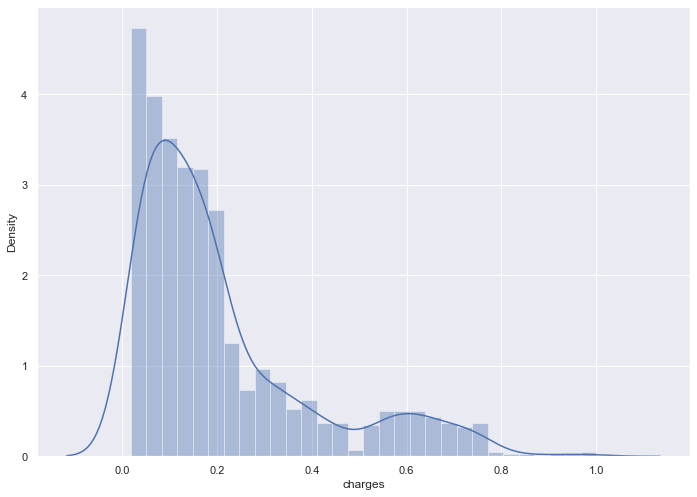

In [34]:
#Visualizing charges column
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['charges'], bins=30)
plt.show()

In [35]:
#Removing outliers
df.drop(df.index[list((np.where(df['charges'] > 0.2)))],inplace = True)

D:\user\anaconda3\envs\dataanalytics\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


<AxesSubplot:>

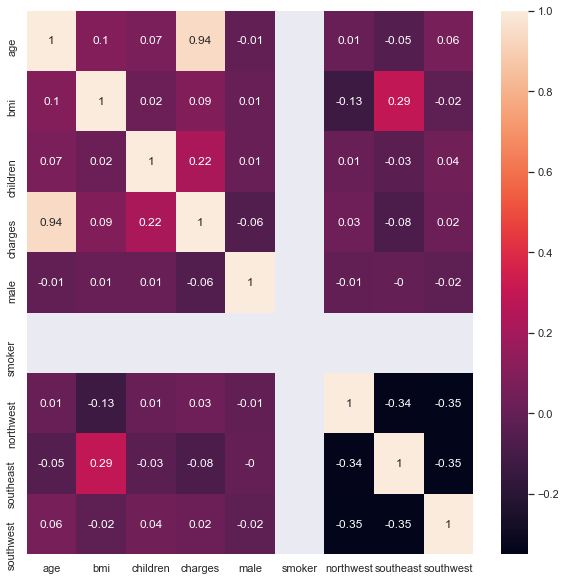

In [36]:
#observing correlation using heatmap
plt.figure(figsize=(10,10))
correlation_matrix =df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


In [37]:
x=df[['age','bmi','children','smoker']]

y=df['charges']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [39]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [40]:
# performance for training set:
y_train_predict = mlr.predict(x_train)
mse=mean_squared_error(y_train, y_train_predict)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set:
y_test_predict = mlr.predict(x_test)
mse=mean_squared_error(y_test, y_test_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set:")
print("\n")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:


MSE is 0.00023910845804612973
RMSE is 0.015463132219771313
R2 score is 0.9157266616349637


The model performance for testing set:


MSE is 0.0002600652635105108
RMSE is 0.01612653910516794
R2 score is 0.9087636286747932


<function matplotlib.pyplot.show(close=None, block=None)>

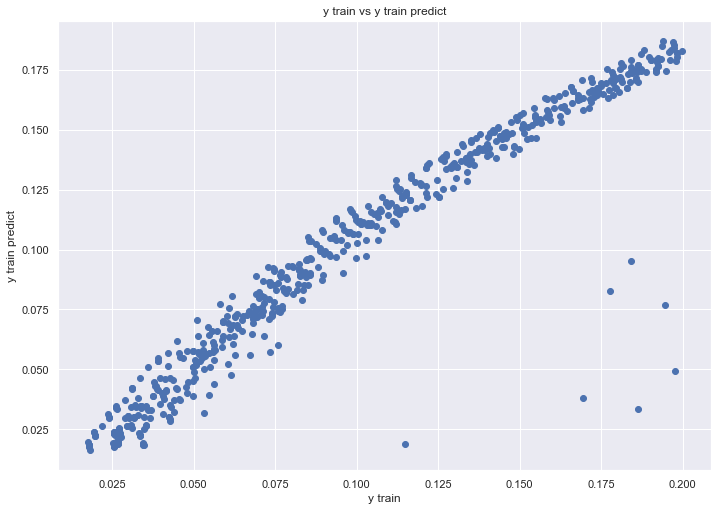

In [41]:
plt.scatter(y_train,y_train_predict)
plt.title('y train vs y train predict')
plt.xlabel('y train')
plt.ylabel('y train predict')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

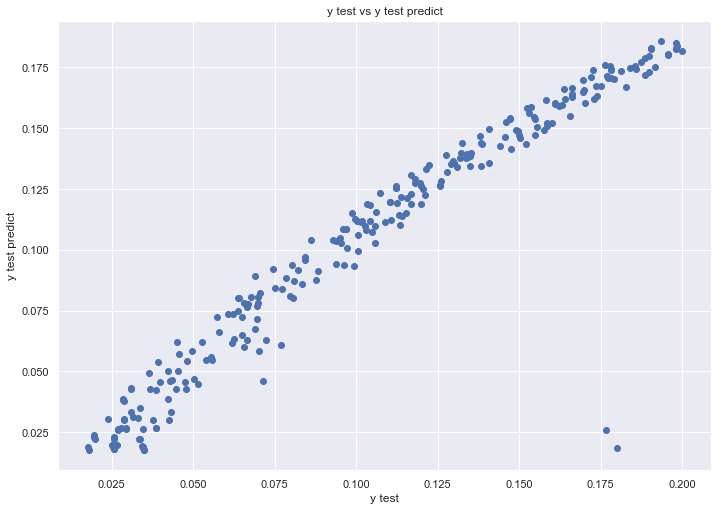

In [42]:
plt.scatter(y_test,y_test_predict)
plt.title('y test vs y test predict')
plt.xlabel('y test')
plt.ylabel('y test predict')
plt.show